In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn import preprocessing 
from sklearn import metrics 

[-7.   -6.85 -6.7  -6.55 -6.4  -6.25 -6.1  -5.95 -5.8  -5.65 -5.5  -5.35
 -5.2  -5.05 -4.9  -4.75 -4.6  -4.45 -4.3  -4.15 -4.   -3.85 -3.7  -3.55
 -3.4  -3.25 -3.1  -2.95 -2.8  -2.65 -2.5  -2.35 -2.2  -2.05 -1.9  -1.75
 -1.6  -1.45 -1.3  -1.15 -1.   -0.85 -0.7  -0.55 -0.4  -0.25 -0.1   0.05
  0.2   0.35  0.5   0.65  0.8   0.95  1.1   1.25  1.4   1.55  1.7   1.85
  2.    2.15  2.3   2.45  2.6   2.75  2.9   3.05  3.2   3.35  3.5   3.65
  3.8   3.95  4.1   4.25  4.4   4.55  4.7   4.85  5.    5.15  5.3   5.45
  5.6   5.75  5.9 ]


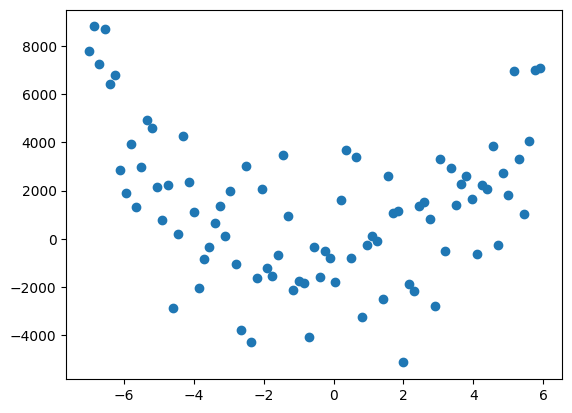

In [6]:
# Setting the seed for the random number generator 
# #set the random seed number as the last two digits on your student ID 1571561

np.random.seed(61) 
# 
# # Random Datapoints Generator: # You are creating an array of x values ranging from -7 to 6 with a step of 0.15
x = np.arange(-7, 6, 0.15)
print(x)

# This will create a "jitter" in your y-values to simulate real-world data.
random_noise = 2000 * np.random.normal(size = len(x))

# Here, you are creating y-values as a polynomial function of x, added with the random noise.
y = 4*(x**4) + 3*(x**3) + 2*(x**2) + 1*x + 3 + random_noise


# Creating a scatter plot of the x and y values. 
plt.scatter(x,y)

3. The generated points created in step two are your dataset. Axis y is the target. And you need to build a few supervised learning models based on this dataset that predicts the target y. By looking at the dataset, identify the number of features in the above dataset. (2 Marks)

only one feature : x

4. Why predicting y is a supervised learning problem? (1 Mark)

The key consideration is the presence of a known relationship between features and targets, which is the defining characteristic of supervised learning

5. Which Axis represents the label? (1 Mark)

y-axis


6. Is this a classification or regression problem? Why? (2 Marks)

regression problem
A regression problem involves predicting a continuous numerical value as the output

7. Combine the points into a dataframe. (1 Mark)

In [4]:
import pandas as pd

# Combine x and y into a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Display the DataFrame
print(data)


       x            y
0  -7.00  7806.008897
1  -6.85  8811.372743
2  -6.70  7241.715762
3  -6.55  8723.964587
4  -6.40  6409.703966
..   ...          ...
82  5.30  3315.421110
83  5.45  1032.666929
84  5.60  4059.238934
85  5.75  6992.439863
86  5.90  7097.021097

[87 rows x 2 columns]


8. How many samples are in the dataset? (2 Marks)

87

9. Split the data into approximately 80% training and 20% testing sets. (1 Mark)

In [10]:
msk = np.random.rand(len(data)) < 0.8
print(msk)
train = data[msk]
test = data[~msk]

print("Number of samples in training set:", len(train))
print("Number of samples in testing set:", len(test))


[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True]
Number of samples in training set: 78
Number of samples in testing set: 9


10. Extract the train_x and train_y from the training set. (1 Mark)

In [12]:
train_x = train['x']
train_y = train['y']

print(train_x)
print(train_y)


0    -7.00
1    -6.85
2    -6.70
3    -6.55
4    -6.40
      ... 
81    5.15
82    5.30
84    5.60
85    5.75
86    5.90
Name: x, Length: 78, dtype: float64
0     7806.008897
1     8811.372743
2     7241.715762
3     8723.964587
4     6409.703966
         ...     
81    6946.078108
82    3315.421110
84    4059.238934
85    6992.439863
86    7097.021097
Name: y, Length: 78, dtype: float64


11. Extract the test_x and test_y from the testing set. (1 Mark)


In [13]:
test_x = test['x']
test_y = test['y']

print(test_x)
print(test_y)

10   -5.50
16   -4.60
28   -2.80
31   -2.35
38   -1.30
52    0.80
55    1.25
69    3.35
83    5.45
Name: x, dtype: float64
10    2967.439088
16   -2870.371426
28   -1041.390128
31   -4291.706718
38     927.156202
52   -3256.782259
55     -96.817053
69    2922.454192
83    1032.666929
Name: y, dtype: float64


12. Train a simple linear regression model based on the training set. (3 Marks)


In [20]:
from sklearn.linear_model import LinearRegression

# Reshape the features to match the expected input shape
train_x_reshaped = train_x.values.reshape(-1, 1)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(train_x_reshaped, train_y)



LinearRegression()

13. What is the hypothesis in this model? (2 Marks)

h(x) = θ₀ + θ₁*x + θ₂*(x**2) + θ₃*(x**3) + θ₄*(x**4)

14. (Bonus Question) Identify the cost function in your model? (2 Marks)

In [ ]:
mse = np.mean((4*(x**4) + 3*(x**3) + 2*(x**2) + 1*x + 3 + random_noise - model.predict(train_x_reshaped))**2)  

15. Print the coefficient and intercept. (2 Marks)

In [22]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [-138.38443257]
Intercept: 1426.047873693166


16. Test the model by calculating the r2_score (use the test set). (1 Mark)

In [24]:
from sklearn.metrics import r2_score

# Reshape the test features to match the expected input shape
test_x_reshaped = test_x.values.reshape(-1, 1)

# Predict the target values using the trained model
test_y_predicted = model.predict(test_x_reshaped)

# Calculate the R-squared score
r2 = r2_score(test_y, test_y_predicted)

print("R-squared score:", r2)


R-squared score: -0.7248473817883614


17. Plot the best-fit line for the entire dataset. (2 Marks)

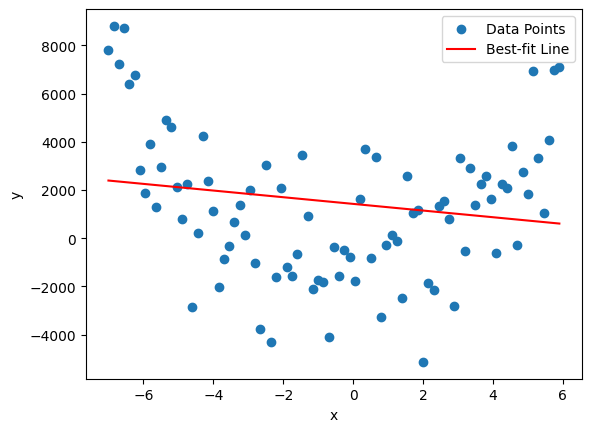

In [26]:
# Generate predicted y values for the entire dataset
x_reshaped = x.reshape(-1, 1)
y_predicted_all = model.predict(x_reshaped)

# Plot the scatter plot of the data points
plt.scatter(x, y, label='Data Points')

# Plot the best-fit line
plt.plot(x, y_predicted_all, color='red', label='Best-fit Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

18. Now you should use a polynomial model to train and test the dataset. What are the major differences between simple linear regression and polynomial models? (2 Marks)

while simple linear regression is suitable for simple linear relationships, polynomial regression is a more powerful approach for capturing non-linear patterns in the data. 


19. Transform the train_x to fit the polynomial feature. (1 Mark)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Specify the degree of the polynomial features
degree = 4  # You can adjust this based on your needs

# Create the PolynomialFeatures object
poly_features = PolynomialFeatures(degree=degree)

# Transform the train_x features to fit the polynomial feature space
train_x_poly = poly_features.fit_transform(train_x.values.reshape(-1, 1))



20. Train a polynomial regression model based on the generated datapoint with the training set. (3 Marks)

In [30]:
# Initialize the polynomial regression model
poly_model = LinearRegression()

# Train the model using the transformed polynomial features and train_y
poly_model.fit(train_x_poly, train_y)

LinearRegression()

21. Specify the degree of the polynomial equation. (1 Mark)

4

22. Justify the degree that you chose. (Why not higher or lower?) (2 Marks)

Choosing a degree lower than 4 might result in underfitting, as the model might struggle to capture the complexities introduced by the x4x4 term. On the other hand, choosing a significantly higher degree could lead to overfitting, where the model captures noise and fluctuations in the data rather than the underlying patterns.

23. Calculate the RMSE and R2 Score based on the test set. (2 Marks)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Transform the test_x features to fit the polynomial feature space
test_x_poly = poly_features.transform(test_x.values.reshape(-1, 1))

# Predict the y values using the trained polynomial regression model
test_y_pred = poly_model.predict(test_x_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# Calculate R2 Score
r2 = r2_score(test_y, test_y_pred)


24. Print the Mean Square Error of the testing set. (2 Marks)

In [32]:
print("RMSE:", rmse)

RMSE: 2716.6733910210237


25. Explain why we use the test set (not the train set) for calculating the RMSE, R2 scores and MSE. (2 Marks)

using the test set for calculating evaluation metrics ensures that we're assessing the model's ability to generalize and perform on new data, rather than simply evaluating its fit to the data it was trained on.

26. Plot the best-fit line. (2 Marks)

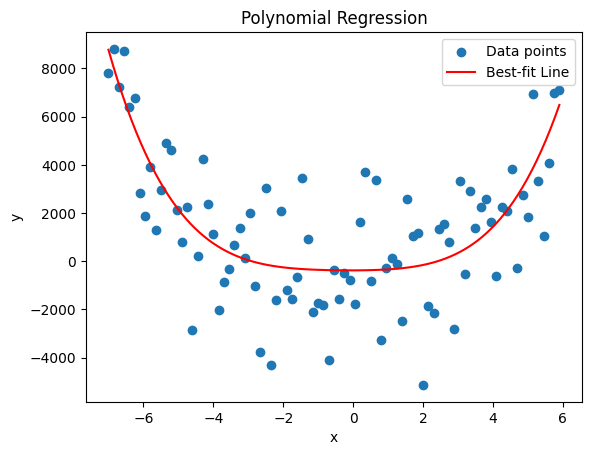

In [33]:
# Generate x values for plotting the best-fit line
x_plot = np.linspace(min(x), max(x), 100)
x_plot_poly = poly_features.transform(x_plot.reshape(-1, 1))

# Predict y values using the trained polynomial regression model
y_plot_pred = poly_model.predict(x_plot_poly)

# Plot the original scatter plot
plt.scatter(x, y, label='Data points')

# Plot the best-fit line
plt.plot(x_plot, y_plot_pred, color='red', label='Best-fit Line')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()

# Show the plot
plt.show()


27. Compare the two models. Compare their r2-score and rmse. Why do you think the results are like that? Explain which one you think performs better and why. (4 Marks)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression
linear_y_pred = model.predict(test_x.values.reshape(-1, 1))
linear_r2 = r2_score(test_y, linear_y_pred)
linear_rmse = np.sqrt(mean_squared_error(test_y, linear_y_pred))

print("Linear Regression Results:")
print("R2-score:", linear_r2)
print("RMSE:", linear_rmse)
print()

# Polynomial Regression
test_x_poly = poly_features.transform(test_x.values.reshape(-1, 1))
poly_y_pred = poly_model.predict(test_x_poly)
poly_r2 = r2_score(test_y, poly_y_pred)
poly_rmse = np.sqrt(mean_squared_error(test_y, poly_y_pred))

print("Polynomial Regression Results:")
print("R2-score:", poly_r2)
print("RMSE:", poly_rmse)


Linear Regression Results:
R2-score: -0.7248473817883614
RMSE: 3279.0596879011996

Polynomial Regression Results:
R2-score: -0.18393235034551103
RMSE: 2716.6733910210237


Both the linear regression and polynomial regression models are performing poorly due to insufficient features.

A higher R2-score indicates a better fit. In this case, the polynomial regression model has a higher R2-score (-0.1839 vs. -0.7248), indicating that it captures more variance in the data.

A lower RMSE is desirable. The polynomial regression model has a lower RMSE (2716.67 vs. 3279.06), which means its predictions are, on average, closer to the actual values compared to the linear regression model.

Thus, the polynomial regression model is performing slightly better in terms of both R2-score and RMSE.

28. If your model performs great on the training data but generalises poorly to new instances, what is happening? (2 Marks)

Overfitting 

29. Try improving the polynomial model by looking at the RMSE, R2 scores and MSE. Write the code for the most efficient polynomial model. The polynomial degree and othe hyperparameters should be optimised to avoid overfitting and underfitting. Justify your hyperparameters and model (3 Marks)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Reshape the features to match the expected input shape
train_x_reshaped = train_x.reshape(-1, 1)

# Create a range of polynomial degrees to try
degrees = [1, 2, 3, 4, 5, 6]

# Split data into training and validation sets
train_x, val_x, train_y, val_y = train_test_split(train_x_reshaped, train_y, test_size=0.2, random_state=42)

best_degree = None
best_r2_score = float('-inf')
lowest_rmse = float('inf')

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(train_x_poly, train_y)
    
    # Transform validation data
    val_x_poly = poly.transform(val_x)
    
    # Predict
    val_y_pred = model.predict(val_x_poly)
    
    # Calculate R2-score
    r2 = r2_score(val_y, val_y_pred)
    
    # Calculate RMSE
    rmse = mean_squared_error(val_y, val_y_pred, squared=False)
    
    if r2 > best_r2_score and rmse < lowest_rmse:
        best_r2_score = r2
        lowest_rmse = rmse
        best_degree = degree

print("Best polynomial degree:", best_degree)


Best polynomial degree: 2
